**IMAGE PREPROCESSING**

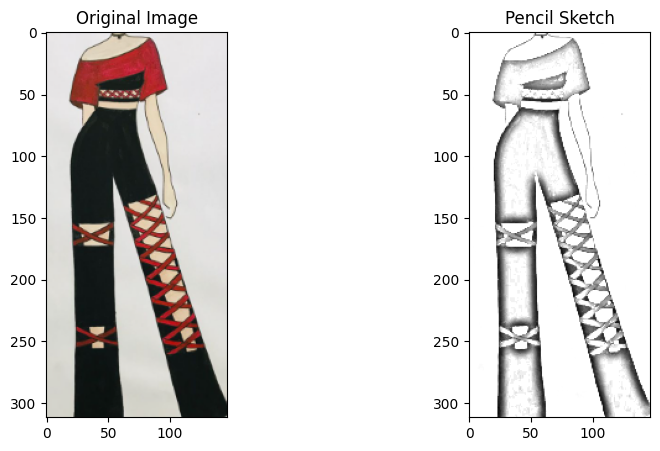

In [ ]:
# Converting single colour/printed image into a pencil sketch

import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_to_pencil_sketch(image_path, ksize=21, sigmaX=0, sigmaY=0, edge_darkening_factor=1.5):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image
    inverted_image = cv2.bitwise_not(gray_image)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(inverted_image, (ksize, ksize), sigmaX=sigmaX, sigmaY=sigmaY)

    # Invert the blurred image
    inverted_blurred = cv2.bitwise_not(blurred)

    # Create the pencil sketch by blending the grayscale image with the inverted blurred image
    sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)

    # Enhance the edges to darken the pencil strokes
    edges = cv2.Canny(gray_image, 50, 150)
    dark_strokes = (edges * edge_darkening_factor).astype(np.uint8)
    dark_strokes = np.clip(dark_strokes, 0, 255)

    # Combine the dark strokes with the sketch
    combined = cv2.addWeighted(sketch, 1, dark_strokes, 0.5, 0)

    return combined

# Path to your image
image_path ='/content/color dress.png'
sketch = convert_to_pencil_sketch(image_path)

# Display the original image and the pencil sketch
original_image = cv2.imread(image_path)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Pencil Sketch')
plt.imshow(sketch, cmap='gray')

plt.show()


In [ ]:
# Converted a dataset of colour/printed image into the dataset of the Pencil sketch images

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def convert_to_pencil_sketch(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image
    inverted_image = cv2.bitwise_not(gray_image)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(inverted_image, (21, 21), sigmaX=0, sigmaY=0)

    # Invert the blurred image
    inverted_blurred = cv2.bitwise_not(blurred)

    # Create the pencil sketch by blending the grayscale image with the inverted blurred image
    sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)

    return sketch

def process_dataset(input_folder, output_folder):
    # Create the output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over all files in the input folder
    for filename in os.listdir(input_folder):
        # Construct the full input and output paths
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Check if the file is an image (optional: you can add more image formats if needed)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            # Convert the image to a pencil sketch
            sketch = convert_to_pencil_sketch(input_path)

            # Save the sketch to the output folder
            cv2.imwrite(output_path, sketch)
            print(f"Processed and saved sketch for {filename}")

# Paths to the input and output folders
input_folder = '/content/drive/MyDrive/Women_Fashion_Dataset/women_fashion'
output_folder = '/content/drive/MyDrive/Sketch_Folder'

# Process the dataset
process_dataset(input_folder, output_folder)


Processed and saved sketch for cream-colored, long, open-front coat with wide lapels.jpg
Processed and saved sketch for beige top adorned with black dots and a green skirt.jpg
Processed and saved sketch for black off-shoulder dress with belt.jpg
Processed and saved sketch for bright red, form-fitting, strapless dress with a high slit on one side revealing part of the leg.jpg
Processed and saved sketch for black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem.jpg
Processed and saved sketch for Anarkali suit with fitted bodice with a high neckline.jpg
Processed and saved sketch for ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg
Processed and saved sketch for black jumpsuit with a diagonal stripe of glittering material running across the body.jpg
Processed and saved sketch for classic black slip dress with a midi length.jpg
Processed and saved sketch for blue dress with a floral pattern.jpg
Processed and saved sketch

**IMAGE CROPPING**

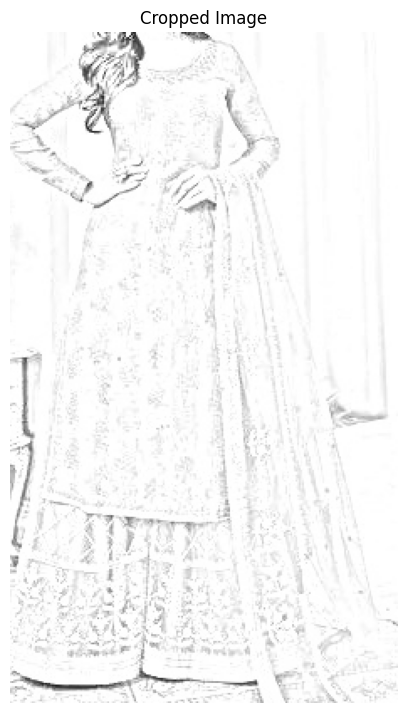

In [ ]:
import cv2
import matplotlib.pyplot as plt

def crop_face_to_ankle(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Define the cropping region
    top = int(0.15 * height)  # Starting from 15% down the height (approximate face region)
    bottom = int(0.95 * height)  # Ending at 95% down the height (approximate ankle region)
    left = int(0.20 * width)  # Starting from 20% of the width
    right = int(0.80 * width)  # Ending at 80% of the width

    # Crop the image
    cropped_image = image[top:bottom, left:right]

    return cropped_image

# Path to your sketch image
image_path = '/content/drive/MyDrive/Sketch_Folder/yellow, intricately designed Anarkali suit.jpeg'
cropped_image = crop_face_to_ankle(image_path)

# Display the cropped image
plt.figure(figsize=(5, 10))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')
plt.show()


In [ ]:
# Cropped the sketch images in order to remove unwanted noice from the images and created a new folder of those cropped images

import os
import cv2

def crop_to_dress(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Define the cropping region dynamically
    top = int(0.20 * height)  # Start cropping from 15% of the height
    bottom = int(0.95 * height)  # End cropping at 95% of the height
    left = int(0.20 * width)  # Start cropping from 20% of the width
    right = int(0.80 * width)  # End cropping at 80% of the width

    # Ensure cropping dimensions are within the image boundaries
    top = max(0, top)
    bottom = min(height, bottom)
    left = max(0, left)
    right = min(width, right)

    # Crop the image
    cropped_image = image[top:bottom, left:right]

    return cropped_image

def process_folder(source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # List all files in the source folder
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Construct full file path
            file_path = os.path.join(source_folder, filename)

            # Crop the image
            cropped_image = crop_to_dress(file_path)

            # Construct the path to save the cropped image
            save_path = os.path.join(destination_folder, filename)

            # Save the cropped image
            cv2.imwrite(save_path, cropped_image)
            print(f'Cropped and saved: {save_path}')

# Define the source and destination folders
source_folder = '/content/drive/MyDrive/Sketch_Folder'  # Replace with your source folder path
destination_folder = '/content/drive/MyDrive/Croped_Sketches'  # Replace with your destination folder path

# Process all images in the source folder
process_folder(source_folder, destination_folder)


Cropped and saved: /content/drive/MyDrive/Croped_Sketches/cream-colored, long, open-front coat with wide lapels.jpg
Cropped and saved: /content/drive/MyDrive/Croped_Sketches/bright red, form-fitting, strapless dress with a high slit on one side revealing part of the leg.jpg
Cropped and saved: /content/drive/MyDrive/Croped_Sketches/beige top adorned with black dots and a green skirt.jpg
Cropped and saved: /content/drive/MyDrive/Croped_Sketches/black off-shoulder dress with belt.jpg
Cropped and saved: /content/drive/MyDrive/Croped_Sketches/black top with spaghetti straps and a black skirt adorned with a fringe detail at the hem.jpg
Cropped and saved: /content/drive/MyDrive/Croped_Sketches/Anarkali suit with fitted bodice with a high neckline.jpg
Cropped and saved: /content/drive/MyDrive/Croped_Sketches/ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg
Cropped and saved: /content/drive/MyDrive/Croped_Sketches/classic black slip dress with a midi length.jp

**FEATURES EXTRACTION**

In [ ]:
# Performed Feature extraction of the images in order to check the similarity and uniqueness
# of the design/pattern in order to generate new trendy designs.

import os
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Load the pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    features = model.predict(img_data)
    return features.flatten()

def extract_and_save_features(source_folder, feature_save_path):
    feature_dict = {}

    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(source_folder, filename)
            features = extract_features(file_path, model)
            feature_dict[filename] = features

    np.save(feature_save_path, feature_dict)
    print(f'Features extracted and saved to {feature_save_path}')

# Define the source folder and where to save the features
source_folder = '/content/drive/MyDrive/Croped_Sketches'  # Replace with your source folder path
feature_save_path = '/content/Croped_Features'  # Path to save the extracted features

# Extract features and save them
extract_and_save_features(source_folder, feature_save_path)


1/1 [==============================] - 1s 577ms/step
Features extracted and saved to /content/Croped_Features


**TEST CASES**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def load_features(feature_path):
    return np.load(feature_path, allow_pickle=True).item()

def find_best_match(submitted_image_path, feature_dict):
    submitted_features = extract_features(submitted_image_path, model)

    best_match = None
    highest_similarity = 0

    for filename, features in feature_dict.items():
        similarity = cosine_similarity([submitted_features], [features])[0][0]
        if similarity > highest_similarity:
            highest_similarity = similarity
            best_match = filename

    return best_match, highest_similarity

# Load the features
feature_dict = load_features('/content/Croped_Features.npy')

# Path to the submitted sketch
submitted_image_path = '/content/drive/MyDrive/Croped_Sketches/yellow, intricately designed Anarkali suit.jpeg'  # Replace with the actual path

# Find the best match
best_match, similarity = find_best_match(submitted_image_path, feature_dict)

if similarity < 0.50:
    print("This image is unique with similarity: {:.2f}%".format(similarity * 100))
else:
    print(f'Best Match: {best_match}, Similarity: {similarity * 100:.2f}%')


1/1 [==============================] - 1s 584ms/step
Best Match: yellow, intricately designed Anarkali suit.jpeg, Similarity: 100.00%


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def load_features(feature_path):
    return np.load(feature_path, allow_pickle=True).item()

def find_best_match(submitted_image_path, feature_dict):
    submitted_features = extract_features(submitted_image_path, model)

    best_match = None
    highest_similarity = 0

    for filename, features in feature_dict.items():
        similarity = cosine_similarity([submitted_features], [features])[0][0]
        if similarity > highest_similarity:
            highest_similarity = similarity
            best_match = filename

    return best_match, highest_similarity

# Load the features
feature_dict = load_features('/content/Croped_Features.npy')

# Path to the submitted sketch
submitted_image_path = '/content/Yellow Embroidered Pakistan____sketch.jpeg'  # Replace with the actual path

# Find the best match
best_match, similarity = find_best_match(submitted_image_path, feature_dict)

if similarity < 0.50:
    print("This image is unique with similarity: {:.2f}%".format(similarity * 100))
else:
    print(f'Best Match: {best_match}, Similarity: {similarity * 100:.2f}%')


1/1 [==============================] - 1s 565ms/step
Best Match: yellow, intricately designed Anarkali suit.jpeg, Similarity: 64.01%


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def load_features(feature_path):
    return np.load(feature_path, allow_pickle=True).item()

def find_best_match(submitted_image_path, feature_dict):
    submitted_features = extract_features(submitted_image_path, model)

    best_match = None
    highest_similarity = 0

    for filename, features in feature_dict.items():
        similarity = cosine_similarity([submitted_features], [features])[0][0]
        if similarity > highest_similarity:
            highest_similarity = similarity
            best_match = filename

    return best_match, highest_similarity

# Load the features
feature_dict = load_features('/content/Croped_Features.npy')

# Path to the submitted sketch
submitted_image_path = '/content/color dress_sketch.png'  # Replace with the actual path

# Find the best match
best_match, similarity = find_best_match(submitted_image_path, feature_dict)

if similarity < 0.50:
    print("This image is unique with similarity: {:.2f}%".format(similarity * 100))
else:
    print(f'Best Match: {best_match}, Similarity: {similarity * 100:.2f}%')


1/1 [==============================] - 1s 563ms/step
This image is unique with similarity: 41.07%
